In [22]:
import pandas as pd
import numpy as np

In [116]:
csv=pd.read_csv("train.csv")
csv.mean()

id         4.999500e+03
rho        1.756800e+01
650_src    1.802125e-01
660_src    2.035285e-01
670_src    2.298040e-01
               ...     
990_dst    2.364072e-10
hhb        7.990686e+00
hbo2       4.009146e+00
ca         9.019226e+00
na         3.042651e+00
Length: 76, dtype: float64

In [118]:
size=len(csv)
x_col=csv.columns[1:-4]
y_col=csv.columns[-4:]
isNan=csv.isna()


x=csv[[i for i in x_col]].as_matrix()
x=[]
for i in range(size):
    temp=[]
    for col in x_col:
        #결측치면 평균으로
        if isNan[col][i]:
            temp.append(csv.mean()[col])
        else:
            temp.append(csv[col][i])
    x.append(temp)

y=[]
for i in range(size):
    total=0
    for col in y_col:
        total+=csv[col][i]
        
    myL=[csv[col][i]/total for col in y_col]
    y.append(myL)

x=np.array(x,dtype=np.float64)
y=np.array(y,dtype=np.float64)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [123]:
print(len(x[0]),len(y[0]))


71 4


In [121]:
import tensorflow as tf
from tensorflow.keras import layers

In [136]:
def dnn(x,y):
    model = tf.keras.Sequential()  #순차적 계층화 준비
    model.add(layers.Dense(30, input_shape=(71,)))  #입력 2개로부터 전달받는 8개 노드의 layer 생성
    model.add(layers.Activation('relu'))  #ReLU 활성화함수 채택
    model.add(layers.Dropout(0.1))        #dropout ratio=10% (배치 훈련시 10% arc 무시)

    model.add(layers.Dense(30))         #4개 노드의 layer 생성
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(4))
    model.add(layers.Activation('softmax')) #분류(classification)을 위해 softmax 함수 사용

    # 모델 구축하기
    model.compile(
        loss='categorical_crossentropy',  #다중 교차엔트로피
        optimizer="rmsprop",   #최적화 기법 중 하나
        metrics=['accuracy'])  #정확도 측정
    
    hist = model.fit(
    x, y,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=800,     
    validation_split=0.2,  
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)
    
    return hist,model


In [137]:
hist,model=dnn(x,y)

Train on 8000 samples, validate on 2000 samples
Epoch 1/800
8000/8000 [==============================] - 1s 106us/sample - loss: 1.3701 - accuracy: 0.4750 - val_loss: 1.3026 - val_accuracy: 0.5730
Epoch 2/800
8000/8000 [==============================] - 0s 20us/sample - loss: 1.3070 - accuracy: 0.5518 - val_loss: 1.3001 - val_accuracy: 0.5880
Epoch 3/800
8000/8000 [==============================] - 0s 22us/sample - loss: 1.3014 - accuracy: 0.5642 - val_loss: 1.2985 - val_accuracy: 0.5900
Epoch 4/800
8000/8000 [==============================] - 0s 20us/sample - loss: 1.2993 - accuracy: 0.5764 - val_loss: 1.2984 - val_accuracy: 0.5900
Epoch 5/800
8000/8000 [==============================] - 0s 21us/sample - loss: 1.2984 - accuracy: 0.5794 - val_loss: 1.2982 - val_accuracy: 0.5900
Epoch 6/800
8000/8000 [==============================] - 0s 21us/sample - loss: 1.2979 - accuracy: 0.5826 - val_loss: 1.2981 - val_accuracy: 0.5900
Epoch 7/800
8000/8000 [==============================] - 0s 19u

Epoch 56/800
8000/8000 [==============================] - 0s 19us/sample - loss: 1.2963 - accuracy: 0.5847 - val_loss: 1.2977 - val_accuracy: 0.5900
Epoch 57/800
8000/8000 [==============================] - 0s 20us/sample - loss: 1.2962 - accuracy: 0.5847 - val_loss: 1.2977 - val_accuracy: 0.5900
Epoch 58/800
8000/8000 [==============================] - 0s 22us/sample - loss: 1.2962 - accuracy: 0.5849 - val_loss: 1.2978 - val_accuracy: 0.5900
Epoch 59/800
8000/8000 [==============================] - 0s 20us/sample - loss: 1.2963 - accuracy: 0.5849 - val_loss: 1.2977 - val_accuracy: 0.5900
Epoch 60/800
8000/8000 [==============================] - 0s 19us/sample - loss: 1.2962 - accuracy: 0.5849 - val_loss: 1.2978 - val_accuracy: 0.5900
Epoch 61/800
8000/8000 [==============================] - 0s 19us/sample - loss: 1.2963 - accuracy: 0.5849 - val_loss: 1.2978 - val_accuracy: 0.5900
Epoch 62/800
8000/8000 [==============================] - 0s 21us/sample - loss: 1.2962 - accuracy: 0.5849

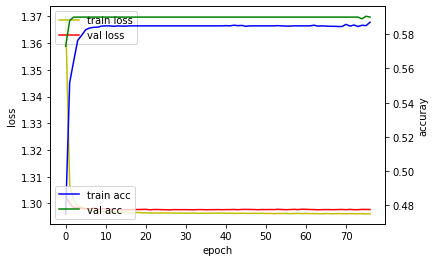

In [138]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [139]:
model.save("first_model.h5")